<a href="https://colab.research.google.com/github/gbuvoli/Prueba_tecnica_TP/blob/main/Prueba_Tecnica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRUEBA TECNICA DATA SCIENCE

## **Objetivo:**

Dentro de una campaña de ventas se quiere incrementar y optimizar el número de ventas efectivas, en este sentido y como propuesta del área de analítica queremos realizar un modelo el cual prediga cuales son los clientes que tienen mayor probabilidad de pago.

Contamos con una base de datos con las siguientes variables, demográficas y de gestiones del cliente.

- **Client_ID:** ID del cliente  
- **Name:** Nombre del cliente  
- **Age:** Edad del cliente  
- **Location:** Estado donde vive el cliente  
- **Income:** Ingresos del cliente  
- **TAX:** Impuestos que paga el cliente  
- **Previous_Sales_#:** Cantidad de compras que ha realizado en el pasado  
- **Type_of_Products:** Tipo de producto que ha comprado  
- **Contact_Channel:** Canal por el que se ha contactado al cliente  
- **Contact_Hour:** Hora de contacto  
- **Num_Contacts:** Número de intentos de contacto  
- **Satisfaction_Score:** Medida de satisfacción (CSAT) de 1 a 5, siendo 5 muy satisfecho  
- **Sales:** Indica si la venta fue efectiva (1: Sí, 0: No)  
              



# DESARROLLO

## 1.	Realice un análisis exploratorio de los datos y explique que transformaciones son necesarias para preparar los datos.

### Importar librerías

In [106]:
#importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Cargue de la data y exploracion

In [107]:
#Loading Dataset

df=pd.read_excel('/content/drive/MyDrive/PRUEBA TECNICA/Sales_outbound.xlsx')

print(df.shape) #Validate Size

df.head() #Validate Header

(1000, 13)


,Client_ID,Name,Age,Location,Income,TAX,previous sales_#,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score,Sales
0,1,NaN,51,FL,80000.0,12000.00,1,B,Email,05:30:00,1,4,0
1,2,NaN,40,CA,82579.0,12386.85,5,A,Phone,16:45:00,2,4,1
2,3,NaN,25,NY,58380.0,8757.00,3,C,Online Chat,06:30:00,4,5,1
3,4,NaN,57,IL,75000.0,11250.00,0,A,Email,05:30:00,3,2,0
4,5,NaN,61,CA,50049.0,7507.35,0,B,Email,09:00:00,1,4,0


In [108]:
df.tail() #Validate  tail

,Client_ID,Name,Age,Location,Income,TAX,previous sales_#,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score,Sales
995,996,NaN,29,TX,79812.0,11971.80,0,C,Online Chat,11:00:00,4,2,0
996,997,NaN,30,CA,80500.0,12075.00,3,A,Phone,15:00:00,5,1,1
997,998,NaN,42,NY,88643.0,13296.45,0,B,Phone,12:30:00,2,2,0
998,999,NaN,34,CA,74900.0,11235.00,1,A,Online Chat,12:30:00,5,3,0
999,1000,NaN,36,TX,72946.0,10941.90,1,A,Email,06:45:00,5,1,0


**OBSERVACION**

* Datos Cargados correctamente.
* columna `Name`es nula

In [109]:
df.columns

Index(['Client_ID', 'Name', 'Age', 'Location', 'Income', 'TAX',
       'previous sales_# ', 'Type_of_Products', 'Contact_Channel',
       'Contact_hour', 'Num_Contacts', 'Satisfaction_Score', 'Sales'],
      dtype='object')

In [110]:
df.columns = df.columns.str.replace(" ", "_")
df.columns

Index(['Client_ID', 'Name', 'Age', 'Location', 'Income', 'TAX',
       'previous_sales_#_', 'Type_of_Products', 'Contact_Channel',
       'Contact_hour', 'Num_Contacts', 'Satisfaction_Score', 'Sales'],
      dtype='object')

In [111]:
df.rename(columns={"previous_sales_#_": "Previous_Sales_Amnt"}, inplace=True)

In [112]:
print("\n🔹Validate Data types") # To avoid manipulation and visualization issues
df.dtypes


🔹Validate Data types


,0
Client_ID,int64
Name,float64
Age,int64
Location,object
Income,float64
TAX,float64
Previous_Sales_Amnt,int64
Type_of_Products,object
Contact_Channel,object
Contact_hour,object


** OBSERVACIONES**
`Client_ID`, `Name` deben convertirse a `Strings`, no se realizan operaciones con ellos y tampoco se incluyen en los análisis

`Location`,`Type_of_Products`,`Contact_Channel`,`Contact_hour`,`Satisfaction_Score`,`Sales` son categorías aunque algunas sean numeros.

`Contact_hour` no se convierte a Datetime porque no estamos haciendo análisis y predicciones basados en tiempo, esto no es una serie de tiempo.


In [113]:
print("\n🔹 Statistics:") # To Summarize numeric variables
df.describe()


🔹 Statistics:


,Client_ID,Name,Age,Income,TAX,Previous_Sales_Amnt,Num_Contacts,Satisfaction_Score,Sales
count,1000.000000,0.0,1000.000000,996.000000,996.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,NaN,41.191000,63100.329317,9465.049398,2.052000,3.492000,2.558000,0.269000
std,288.819436,NaN,12.259234,21638.692537,3245.803881,2.635952,2.399102,1.331318,0.443662
min,1.000000,NaN,18.000000,5000.000000,750.000000,-7.000000,1.000000,1.000000,0.000000
25%,250.750000,NaN,31.000000,46277.750000,6941.662500,0.000000,2.000000,1.000000,0.000000
50%,500.500000,NaN,40.500000,62770.500000,9415.575000,1.000000,3.000000,2.000000,0.000000
75%,750.250000,NaN,51.000000,80618.000000,12092.700000,4.000000,5.000000,3.000000,1.000000
max,1000.000000,NaN,125.000000,165355.000000,24803.250000,25.000000,33.000000,5.000000,1.000000


**OBSERVACIONES**

- Hay 1000 datos, pero `Income`y `Tax`tienen 996, es decir, tienen 4 `Nulls`
- Existen **OUTLIERS** que me afectan las estadísticas. `Age` maxima de 125, `previous sales_#` de -7


### Identificacion y distribución de Nulos

In [114]:
print("\n🔹 Valores nulos por columna:")
print(df.isnull().sum())


🔹 Valores nulos por columna:
Client_ID                 0
Name                   1000
Age                       0
Location                  0
Income                    4
TAX                       4
Previous_Sales_Amnt       0
Type_of_Products          0
Contact_Channel           0
Contact_hour              0
Num_Contacts              0
Satisfaction_Score        0
Sales                     0
dtype: int64


**OBSERVACIONES**
Efectivamente como se sospechaba `Income`y `Tax` tienen 4 nulos, mientras que toda la columna `Name`es nula.

Para definir el manejo adecuado de estos nulos, miremos su distribución en el Dataset

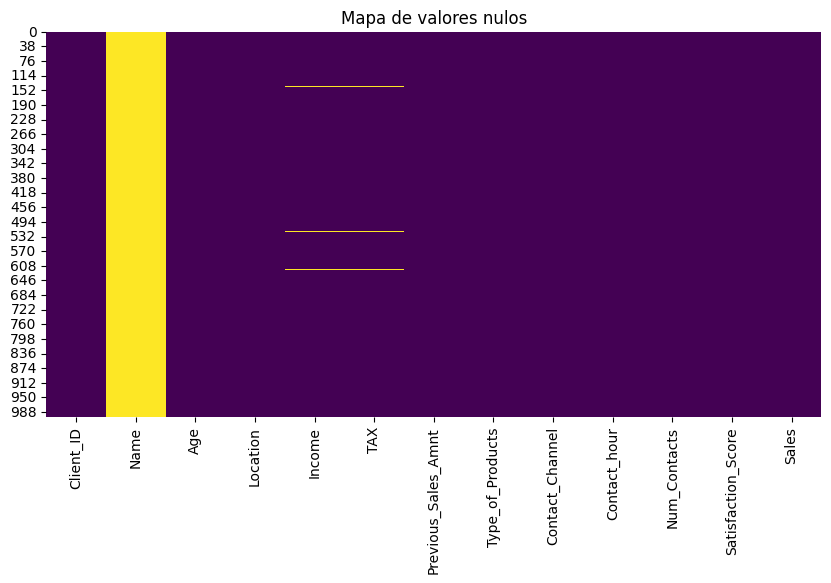

In [115]:
### Visualización de valores nulos
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Mapa de valores nulos')
plt.show()

**OBSERVACION**
- Los valores nulos de `Income`y `TAX` corresponden a los mismos clientes.
- Por lo tanto, podría considerarse una imputación por KNN o regresión, eliminarlos también es una opción.

In [116]:
#Nulls values in Income and TAX seems to be the same Client, lets check
df[df['Income'].isnull() & df['TAX'].isnull()]

,Client_ID,Name,Age,Location,Income,TAX,Previous_Sales_Amnt,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score,Sales
142,143,NaN,49,TX,NaN,NaN,9,C,Phone,08:15:00,1,4,1
372,373,NaN,40,TX,NaN,NaN,0,A,Online Chat,05:30:00,1,3,0
519,520,NaN,48,FL,NaN,NaN,0,B,Phone,10:15:00,3,1,0
618,619,NaN,40,NY,NaN,NaN,3,C,Phone,07:30:00,1,5,1


Ajustamos los tipos de Datos para facilitar los próximos análisis y visualizaciones

In [117]:
#Adjust Data types:

#To String

df['Client_ID'] = df['Client_ID'].astype(str)
df['Name'] = df['Name'].astype(str)

#To Categories
categorical_cols = ['Location', 'Type_of_Products', 'Contact_Channel','Sales','Satisfaction_Score','Contact_hour']
df[categorical_cols] = df[categorical_cols].astype('category')

#Validate

df.dtypes

,0
Client_ID,object
Name,object
Age,int64
Location,category
Income,float64
TAX,float64
Previous_Sales_Amnt,int64
Type_of_Products,category
Contact_Channel,category
Contact_hour,category


### Analisis Univariado

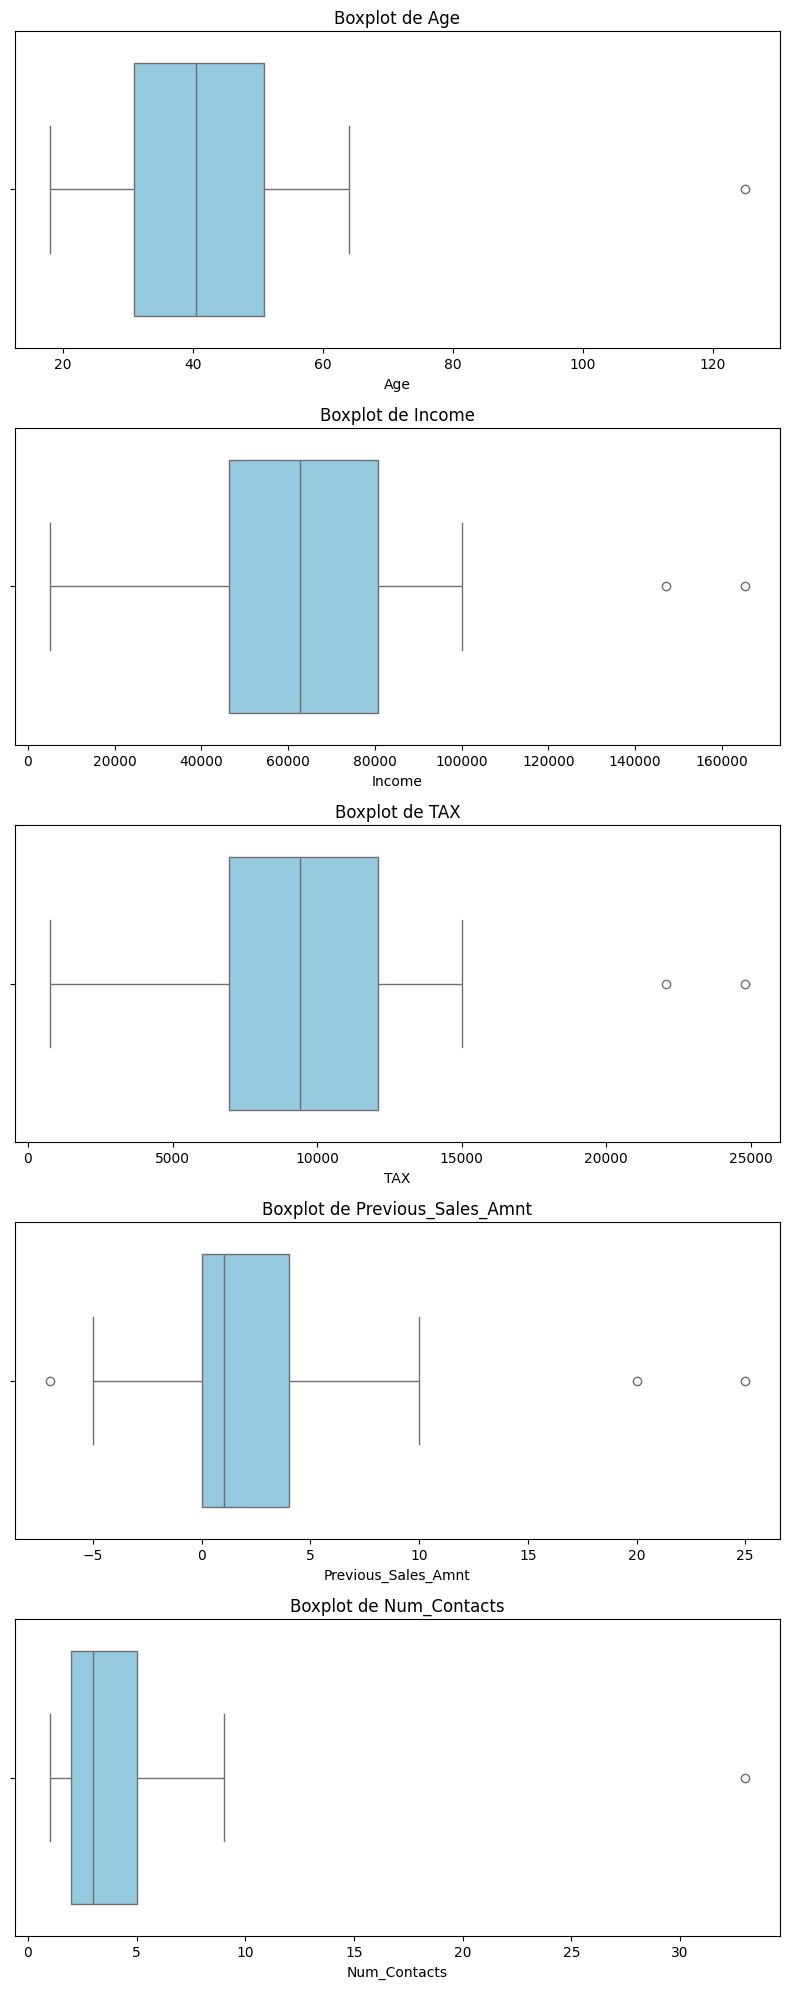

In [118]:
# Seleccionar solo columnas numéricas
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Definir el tamaño de la figura
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(8, 4 * len(numerical_cols)))

# Si solo hay una variable numérica, aseguramos que 'axes' sea una lista
if len(numerical_cols) == 1:
    axes = [axes]

# Generar boxplots en los subplots
for ax, col in zip(axes, numerical_cols):
    sns.boxplot(x=df[col], ax=ax, color='skyblue')
    ax.set_title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()


**OBSERVACIONES**
 - Los Outliers que requieren manejo por considerarlos "imposibles" son los de `Age` y`Previous Sales` (valores negativos)
 - Los Outliers de `Num_Contacts`, `Previos Sales`, `Income`y `TAX`, son viables en la realidad.

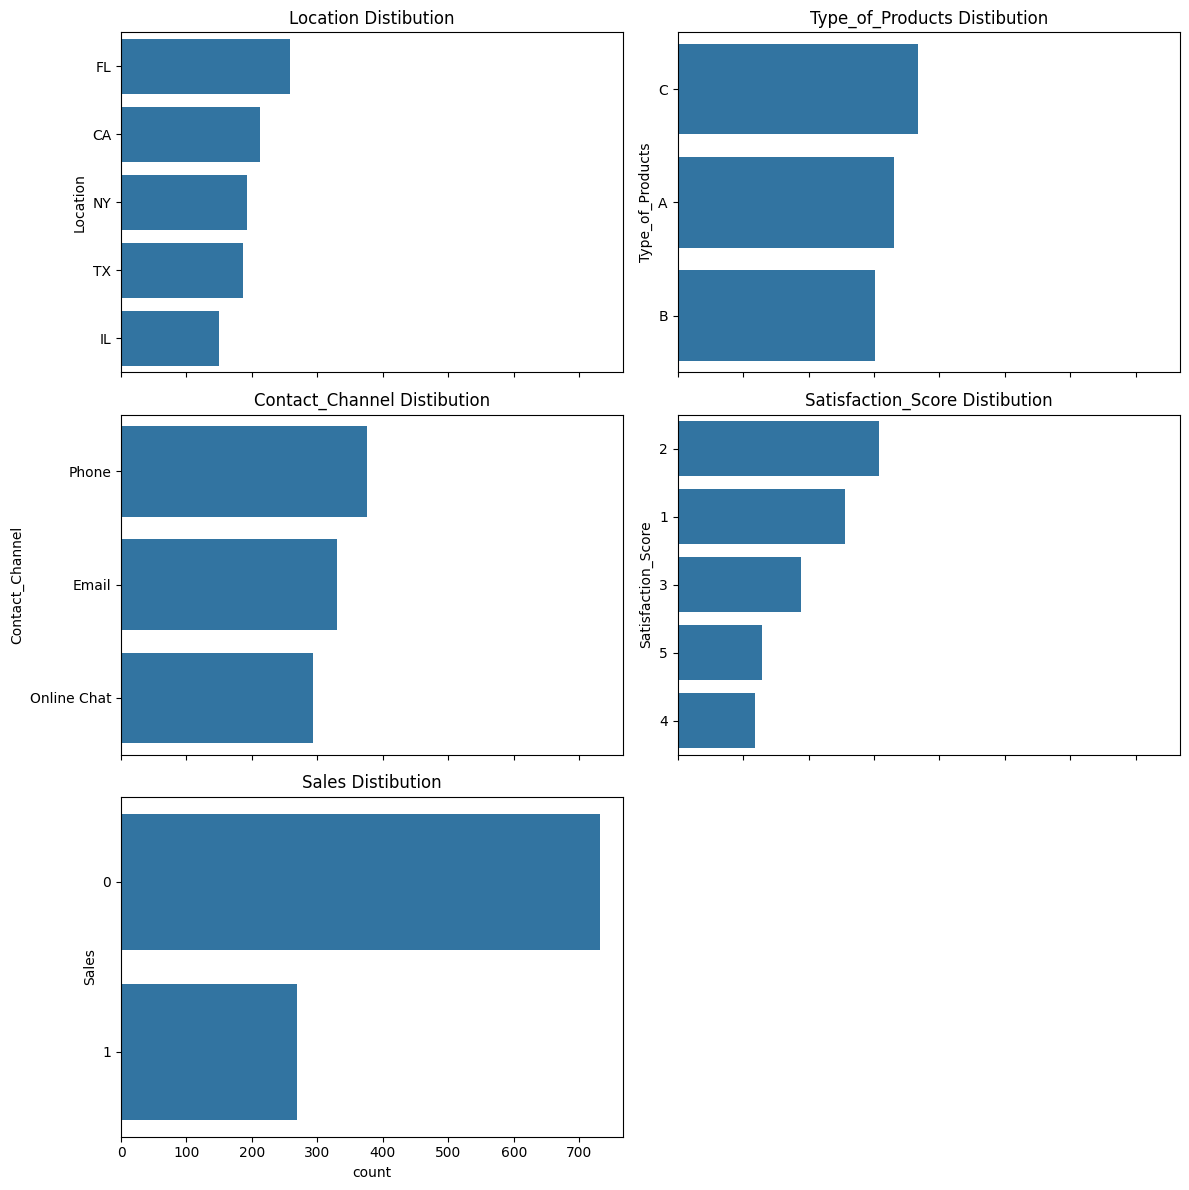

In [119]:
# Seleccionar columnas categóricas
categorical_cols = df.select_dtypes('category').columns

# Definir número de filas y columnas
nc = 2  # Número de columnas
nr = int(np.ceil(len(categorical_cols) / nc))  # Número de filas dinámico

# Crear subplots
fig, axes = plt.subplots(nrows=nr, ncols=nc, figsize=(12, 4 * nr),sharex=True)

# Aplanar `axes` para evitar problemas al iterar
axes = axes.flatten()

# Generar gráficos en los subplots
for i, col in enumerate(categorical_cols.drop('Contact_hour')):
    sns.countplot(y=df[col], order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"{col} Distibution")

# Eliminar subplots vacíos si hay más espacios que gráficos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**OBSERVACIONES**

- Mi variable objetivo `Sales` se encuentra desbalanceada, por lo que para realizar los modelos debemos considerar una técnica de "Upsampling"


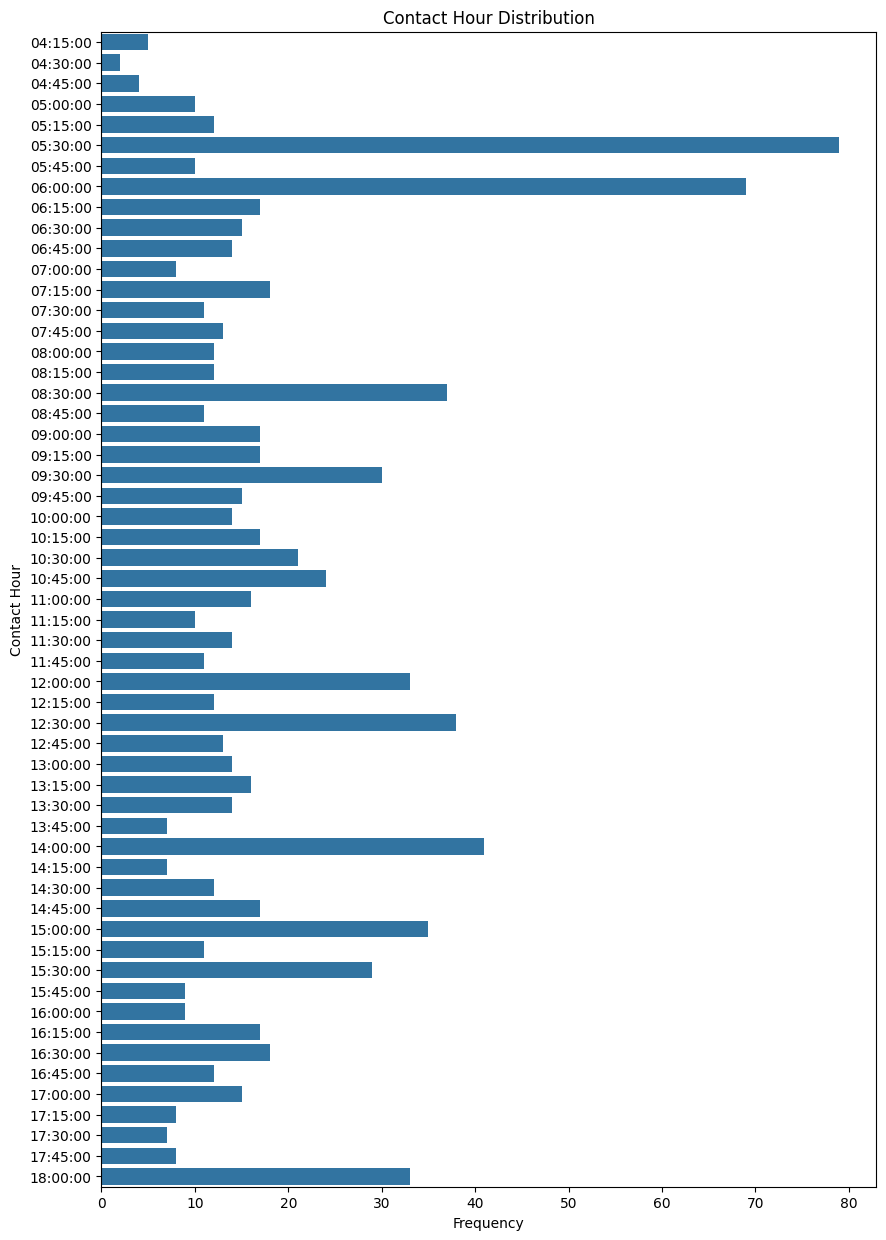

In [120]:
#Validate Contact Hour Counts sorted ascending
plt.figure(figsize=(10, 15))
sns.countplot(y=df['Contact_hour'], order=sorted(df['Contact_hour'].unique()))
plt.title("Contact Hour Distribution")
plt.xlabel("Frequency")
plt.ylabel("Contact Hour")
plt.show()

### Analisis Bivariado

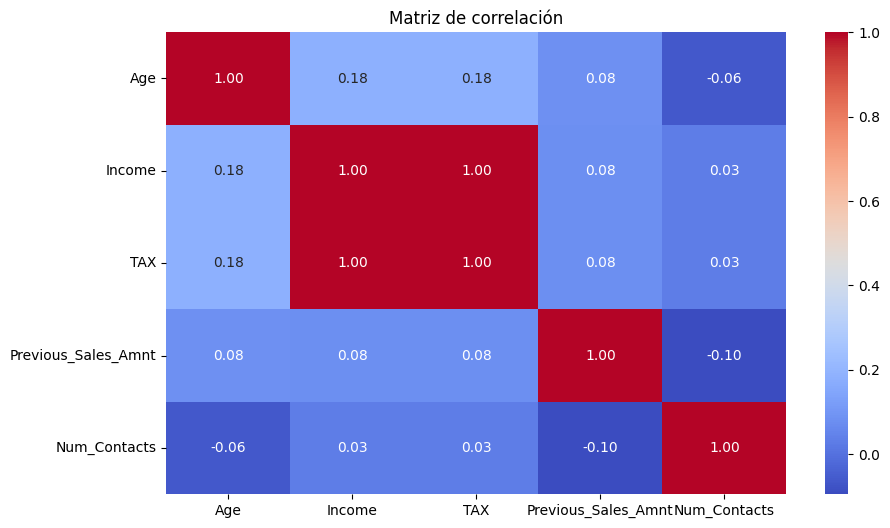

In [121]:
### Correlation Matrix (Numeric Vars)
plt.figure(figsize=(10, 6))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

**OBSERVACIONES**

Confirmando la correlación perfecta entre Income y TAX, concluimos que podemos prescindir de una de ellas en nuestro análisis y a imputar los valores faltantes.

Igualmente se confirma que los Outliers de estas variables no son errores.

Procederemos a realizar el manejo de Nulos y Outliers y volver a calcular la matríz de correlación.


### MANEJO DE NULOS Y OUTLIERS

In [122]:
def detect_outliers_iqr(df, cols):
    outliers = {}
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers

In [123]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
outliers = detect_outliers_iqr(df, numerical_cols)

# Mostrar outliers detectados
for col, vals in outliers.items():
    print(f"Outliers en {col}: {len(vals)} valores detectados: {vals.values}")

Outliers en Age: 1 valores detectados: [125]
Outliers en Income: 2 valores detectados: [147014. 165355.]
Outliers en TAX: 2 valores detectados: [22052.1  24803.25]
Outliers en Previous_Sales_Amnt: 3 valores detectados: [20 25 -7]
Outliers en Num_Contacts: 1 valores detectados: [33]


In [124]:
#Total de valores inconsistentes
inconsistencies= df[(df['Previous_Sales_Amnt']<0)|(df['Age']>100)|(df['Income'].isnull())|(df['TAX'].isnull())]
inconsistencies

,Client_ID,Name,Age,Location,Income,TAX,Previous_Sales_Amnt,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score,Sales
12,13,nan,125,FL,46309.0,6946.35,4,A,Phone,13:45:00,1,4,1
142,143,nan,49,TX,NaN,NaN,9,C,Phone,08:15:00,1,4,1
372,373,nan,40,TX,NaN,NaN,0,A,Online Chat,05:30:00,1,3,0
519,520,nan,48,FL,NaN,NaN,0,B,Phone,10:15:00,3,1,0
618,619,nan,40,NY,NaN,NaN,3,C,Phone,07:30:00,1,5,1
710,711,nan,45,TX,39557.0,5933.55,-5,B,Online Chat,09:15:00,5,1,0
923,924,nan,25,FL,78781.0,11817.15,-7,B,Email,16:15:00,6,3,0


In [125]:
limite=0.01
if len(inconsistencies)/len(df) < limite:
  df_clean= df.drop(inconsistencies.index)
  print('Se eliminaron valores inconsistentes')
  print(len(df_clean))
else:
  print('No se eliminaron valores inconsistentes considere otras tecnicas')


Se eliminaron valores inconsistentes
993


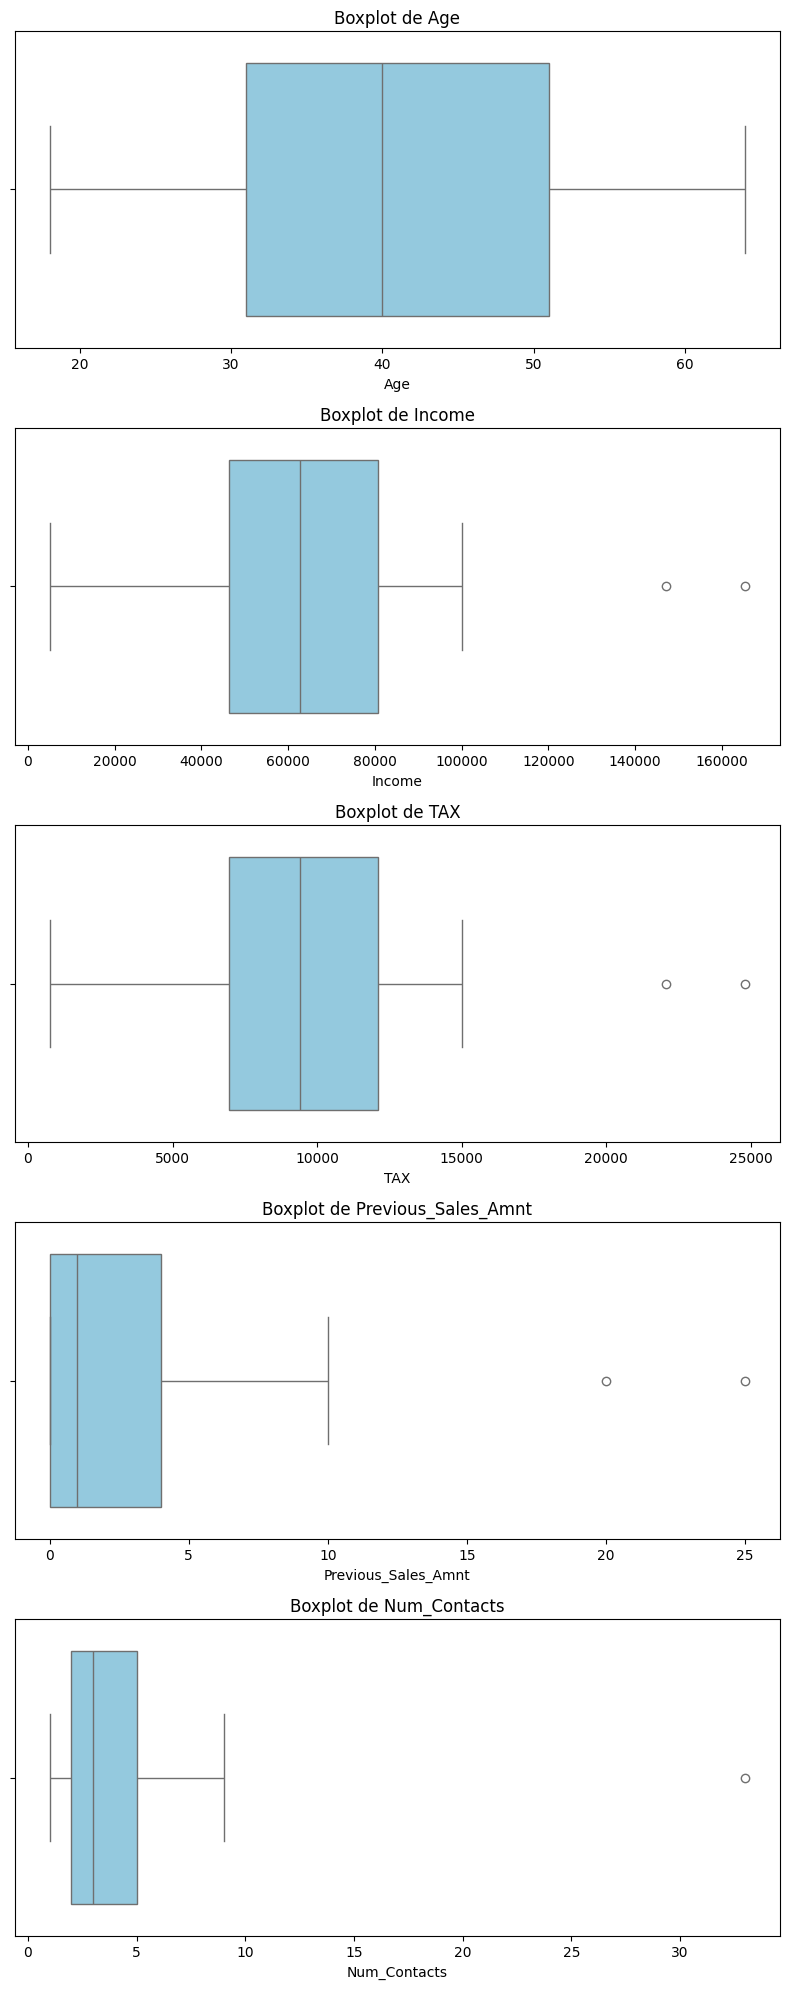

In [126]:
# Seleccionar solo columnas numéricas
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns

# Definir el tamaño de la figura
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(8, 4 * len(numerical_cols)))

# Si solo hay una variable numérica, aseguramos que 'axes' sea una lista
if len(numerical_cols) == 1:
    axes = [axes]

# Generar boxplots en los subplots
for ax, col in zip(axes, numerical_cols):
    sns.boxplot(x=df_clean[col], ax=ax, color='skyblue')
    ax.set_title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()


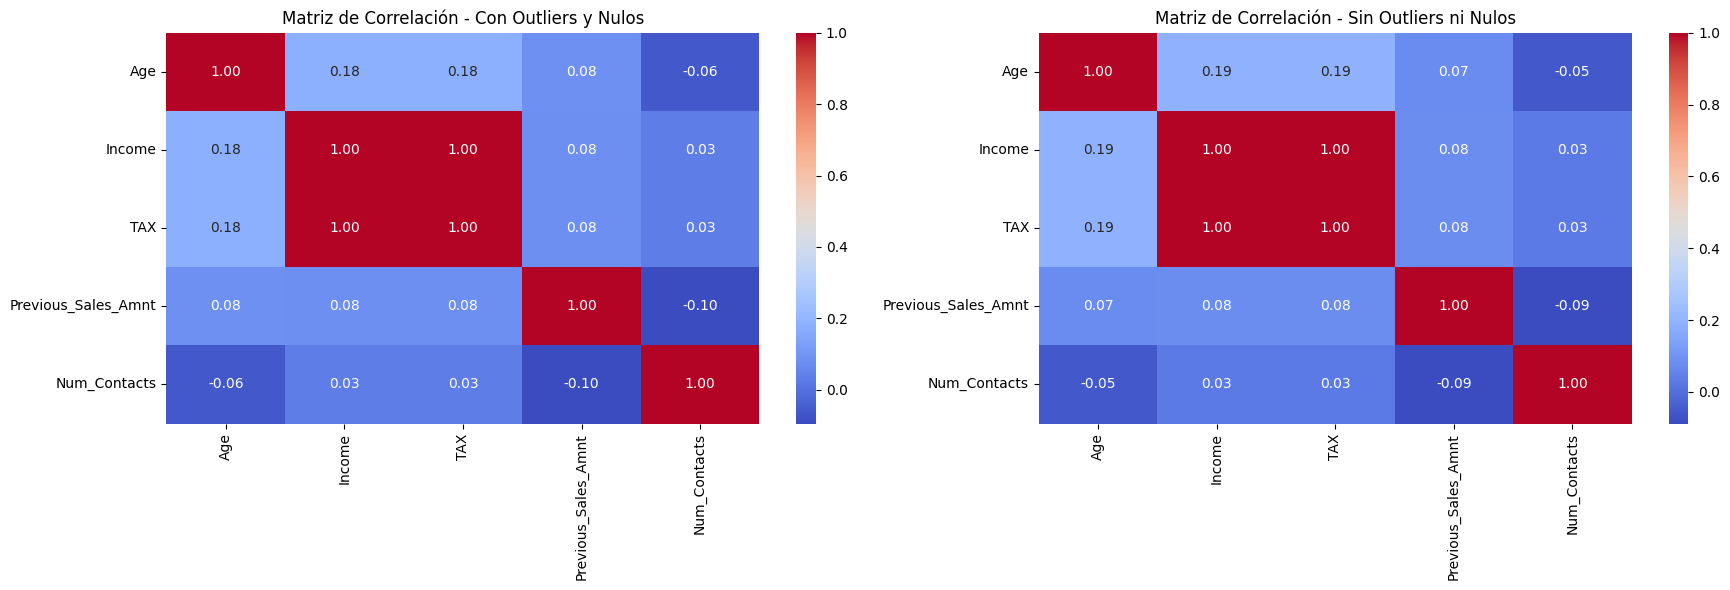

In [127]:
#COMPARACION DE MATRICES
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Matriz de correlación original
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title("Matriz de Correlación - Con Outliers y Nulos")

# Matriz de correlación sin outliers ni nulos
sns.heatmap(df_clean.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title("Matriz de Correlación - Sin Outliers ni Nulos")

plt.tight_layout()
plt.show()


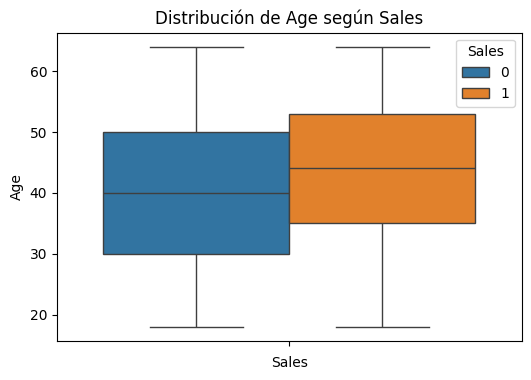

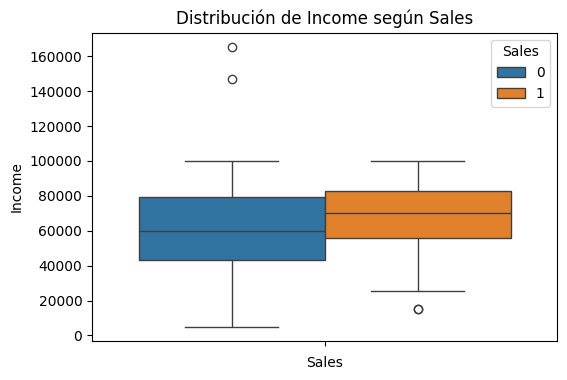

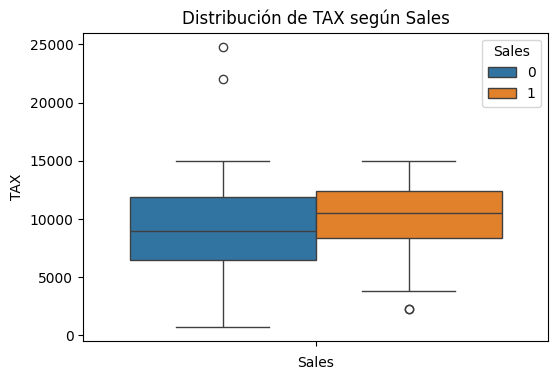

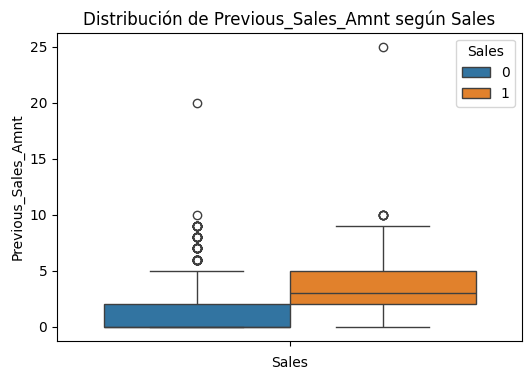

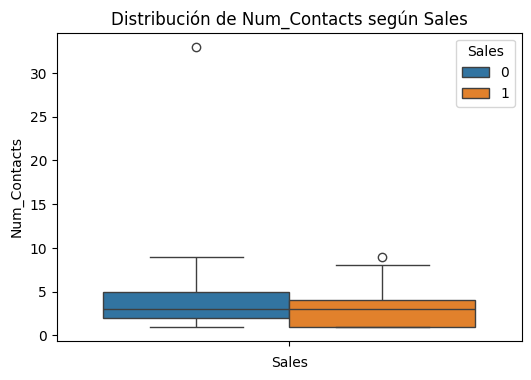

In [128]:
### Relación entre variables numéricas y Sales
numerical_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(hue=df_clean["Sales"], y=df_clean[col], legend=True)
    plt.xlabel("Sales")
    plt.ylabel(col)
    plt.title(f"Distribución de {col} según Sales")
    plt.show()

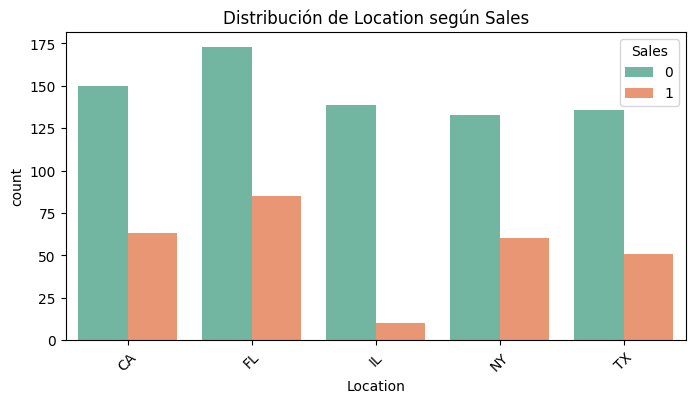

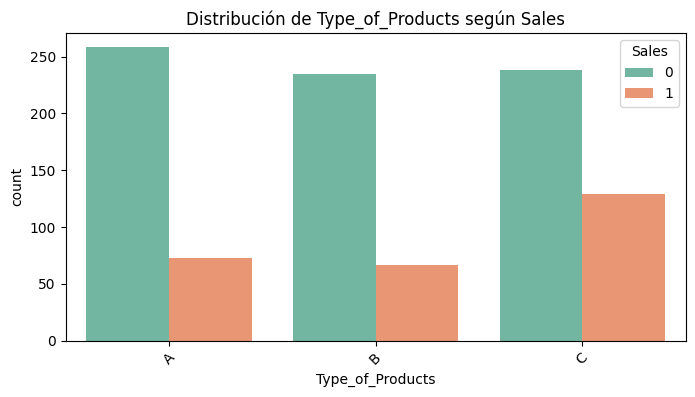

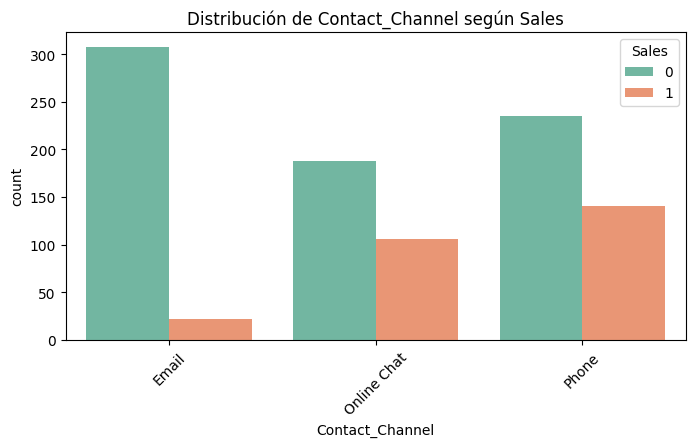

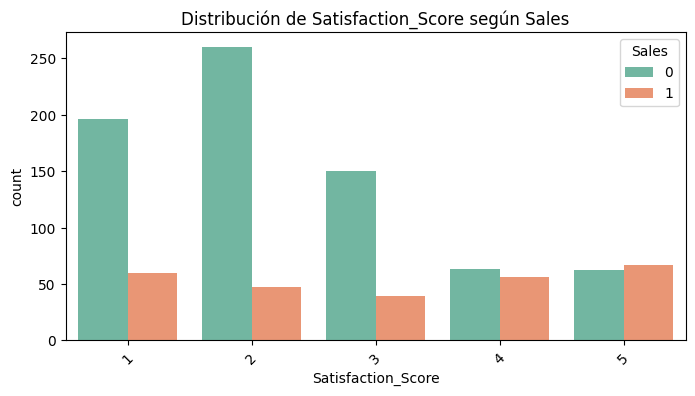

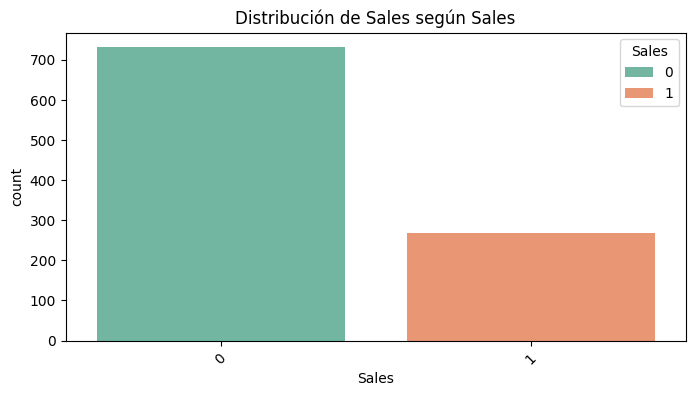

In [129]:
### Relación entre variables categóricas y Sales
for col in categorical_cols.drop('Contact_hour'):
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[col], hue=df["Sales"], palette="Set2")
    plt.title(f"Distribución de {col} según Sales")
    plt.xticks(rotation=45)
    plt.show()

Satisfaction Score should not be taken into account for the prediction unless I have this number previous to the call.

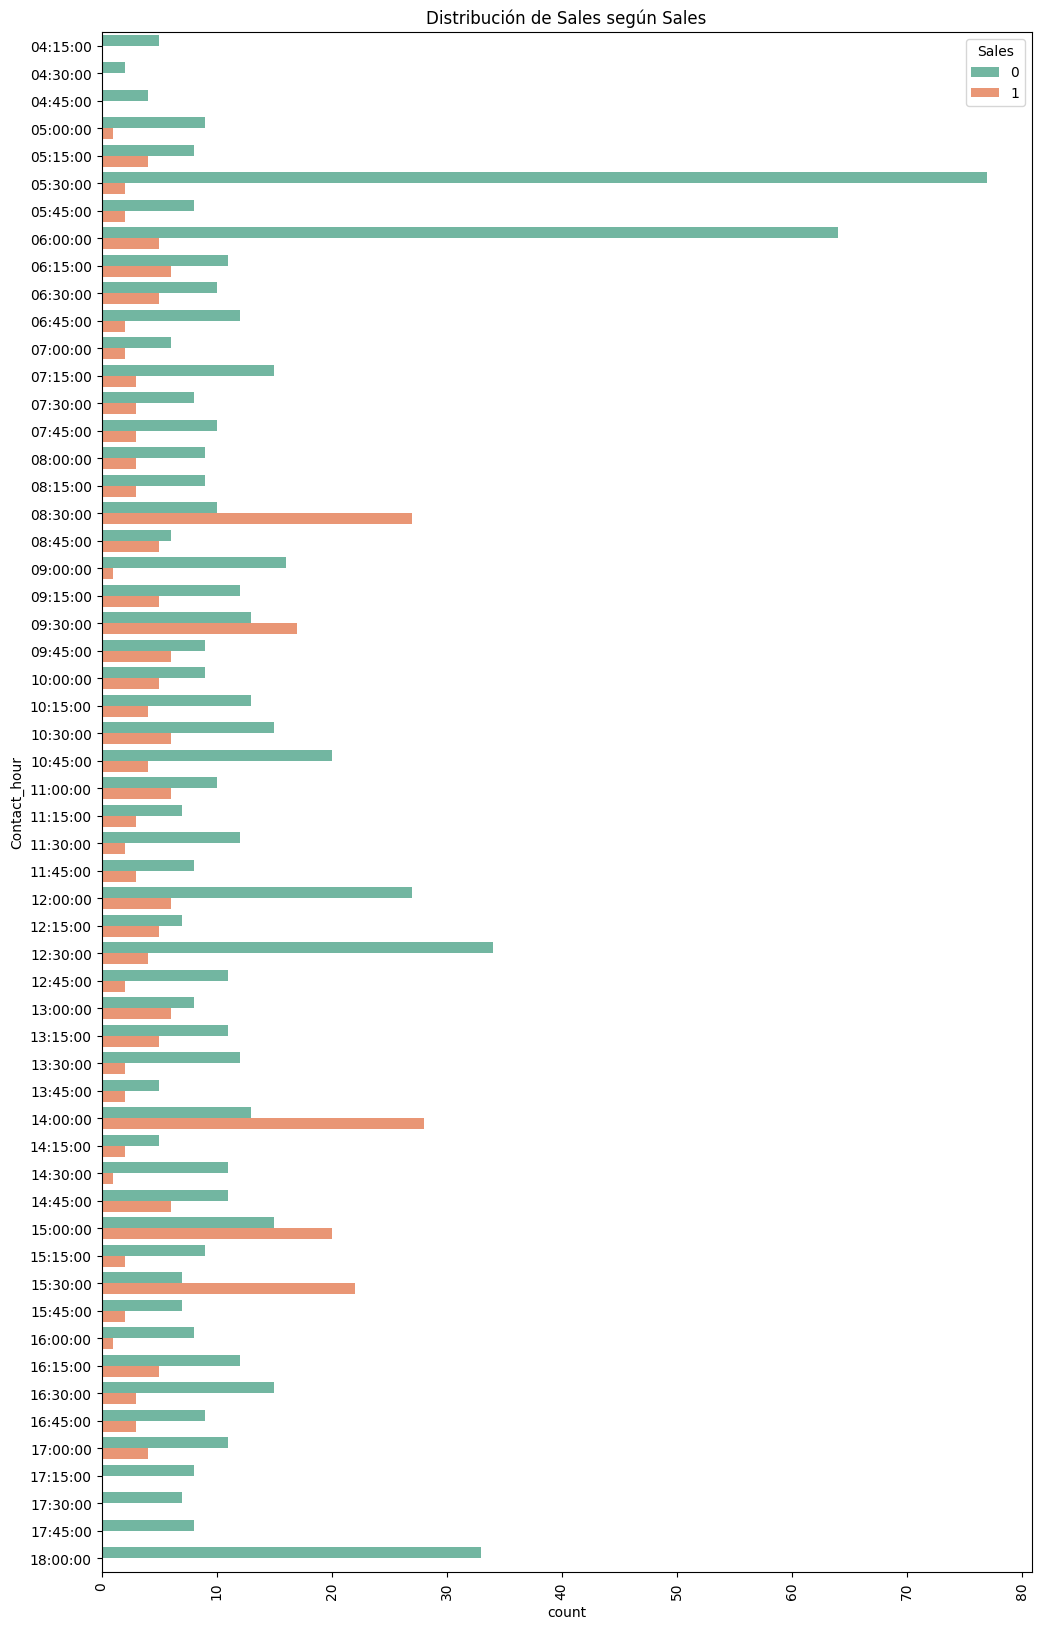

In [130]:
    plt.figure(figsize=(12, 20))
    sns.countplot(y=df['Contact_hour'], hue=df["Sales"], palette="Set2")
    plt.title(f"Distribución de {col} según Sales")
    plt.xticks(rotation=90)
    plt.show()

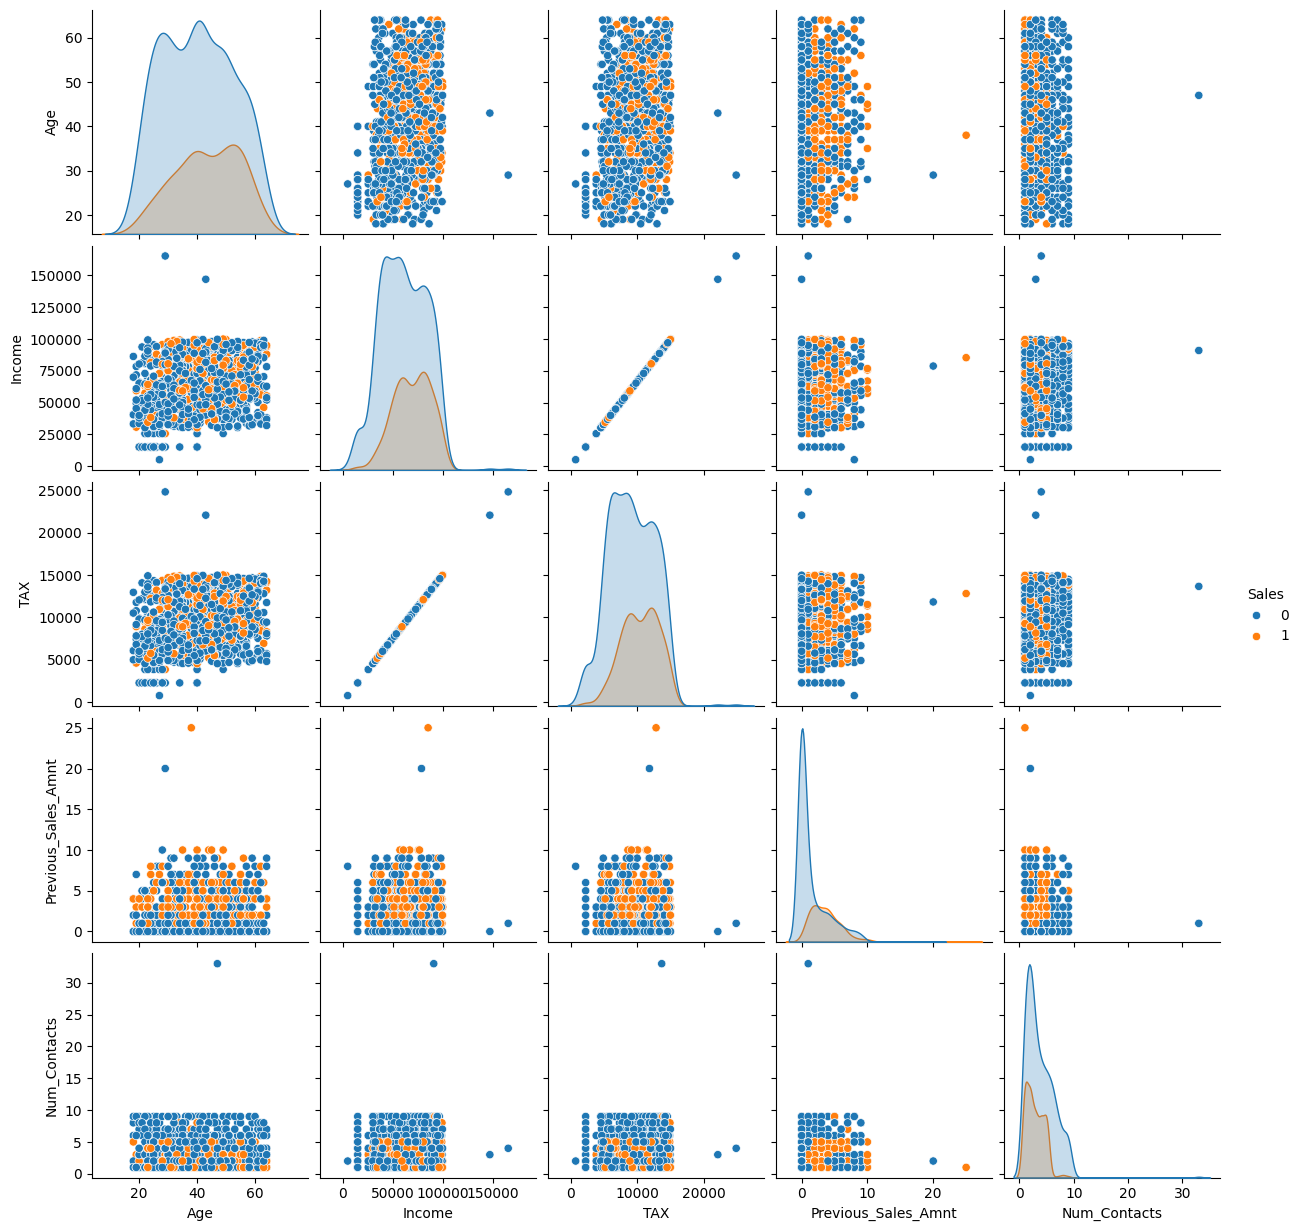

In [131]:
sns.pairplot(df_clean, hue='Sales')
plt.show()

### PRUEBA DE HIPOTESIS PARA MEDIR LOS IMPACTOS DE LAS VARIABLES PREDICTORAS EN LA VARIABLE OBJETIVO

In [132]:
from scipy import stats
from scipy.stats import chi2_contingency

# Filtrar variables numéricas y categóricas
numerical_vars = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_vars = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()

# Inicializar lista de resultados
results = []

# Pruebas para variables numéricas (t-test)
for var in numerical_vars:
    group_0 = df_clean[df_clean['Sales'] == 0][var]
    group_1 = df_clean[df_clean['Sales'] == 1][var]

    stat, p = stats.ttest_ind(group_0, group_1, nan_policy='omit')
    impacto = "Significativo" if p < 0.05 else "No Significativo"
    results.append({'Variable': var, 'Tipo': 'Numérica', 'Test': 't-test', 'Estadística': stat, 'p-value': p, 'Impacto': impacto})

# Pruebas para variables categóricas (Chi-cuadrado)
for var in categorical_vars:
    if var != 'Sales': # Skip if the variable is Sales
        contingency_table = pd.crosstab(df_clean[var], df_clean['Sales'])
        stat, p, _, _ = chi2_contingency(contingency_table)
        impacto = "Significativo" if p < 0.05 else "No Significativo"
        results.append({'Variable': var, 'Tipo': 'Categórica', 'Test': 'Chi-cuadrado', 'Estadística': stat, 'p-value': p, 'Impacto': impacto})

# Convertir a DataFrame
df_results = pd.DataFrame(results)

# Ordenar por p-value
df_results = df_results.sort_values(by='p-value')
df_results





,Variable,Tipo,Test,Estadística,p-value,Impacto
3,Previous_Sales_Amnt,Numérica,t-test,-12.340601,1.193030e-32,Significativo
10,Contact_hour,Categórica,Chi-cuadrado,237.708953,1.442196e-24,Significativo
9,Contact_Channel,Categórica,Chi-cuadrado,101.415154,9.505589e-23,Significativo
11,Satisfaction_Score,Categórica,Chi-cuadrado,87.711978,4.030942e-18,Significativo
4,Num_Contacts,Numérica,t-test,5.531560,4.060966e-08,Significativo
1,Income,Numérica,t-test,-5.409169,7.938652e-08,Significativo
2,TAX,Numérica,t-test,-5.409169,7.938652e-08,Significativo
7,Location,Categórica,Chi-cuadrado,37.925696,1.160813e-07,Significativo
8,Type_of_Products,Categórica,Chi-cuadrado,18.889004,7.912340e-05,Significativo
0,Age,Numérica,t-test,-3.841512,1.300516e-04,Significativo


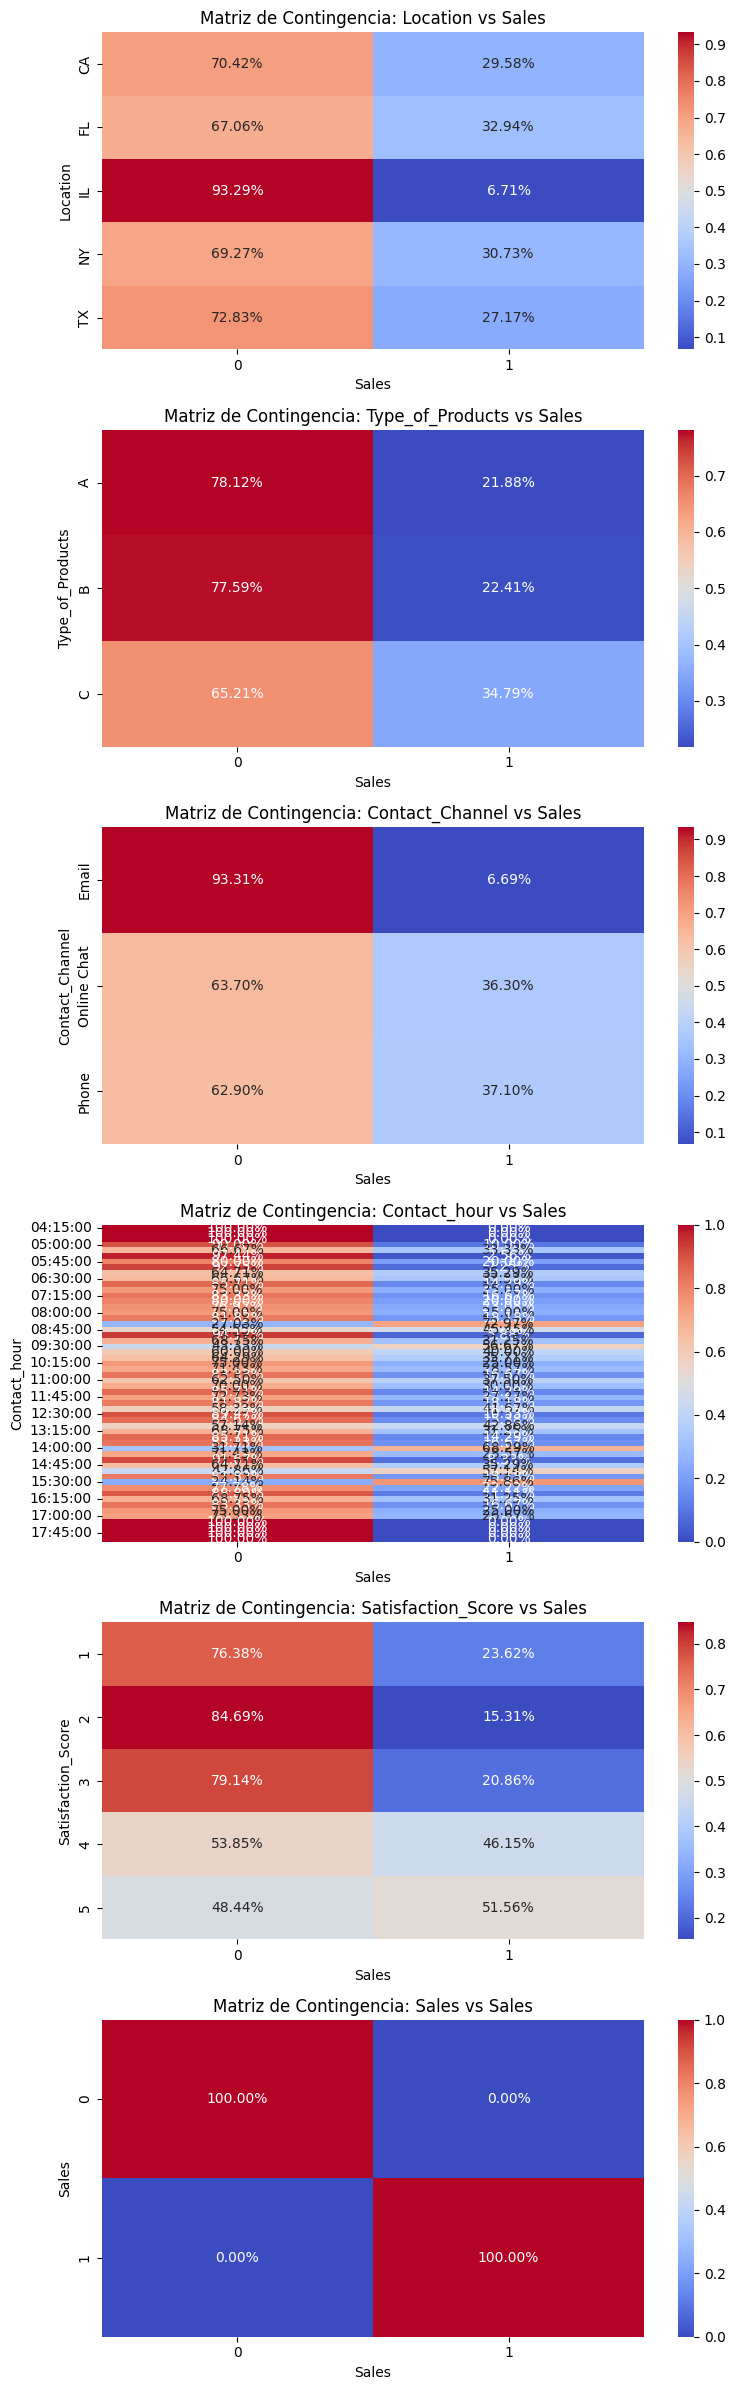

In [133]:
# Seleccionar variables categóricas
categorical_vars =df_clean.select_dtypes('category').columns.tolist()

# Crear subplots
fig, axes = plt.subplots(nrows=len(categorical_vars), figsize=(8, 4 * len(categorical_vars)))

# Generar gráficos de heatmap
for ax, var in zip(axes, categorical_vars):
    contingency_table = pd.crosstab(df_clean[var], df_clean['Sales'], normalize='index')  # Normalización por fila
    sns.heatmap(contingency_table, annot=True, fmt=".2%", cmap='coolwarm', cbar=True, ax=ax)
    ax.set_title(f'Matriz de Contingencia: {var} vs Sales')

plt.tight_layout()
plt.show()


## Transformaciones para los modelos

In [134]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Eliminamos Name, Client_ID porque no tienen impacto en la variable objetivo.

Eliminamos TAX por multicolinearidad.

In [135]:
X=df_clean.drop(['Name','Client_ID','TAX','Sales'],axis=1)
y = df_clean['Sales']
X.head()

,Age,Location,Income,Previous_Sales_Amnt,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score
0,51,FL,80000.0,1,B,Email,05:30:00,1,4
1,40,CA,82579.0,5,A,Phone,16:45:00,2,4
2,25,NY,58380.0,3,C,Online Chat,06:30:00,4,5
3,57,IL,75000.0,0,A,Email,05:30:00,3,2
4,61,CA,50049.0,0,B,Email,09:00:00,1,4


## Corremos modelos optimizando el F1-SCORE

Best model for Logistic Regression: {'C': 0.1}
Best model for Random Forest: {'max_depth': 5, 'n_estimators': 10}
Best model for XGBoost: {'learning_rate': 0.1, 'n_estimators': 10}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 581, number of negative: 581
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1257
[LightGBM] [Info] Number of data points in the train set: 1162, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Best model for LightGBM: {'learning_rate': 0.1, 'n_estimators': 10}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


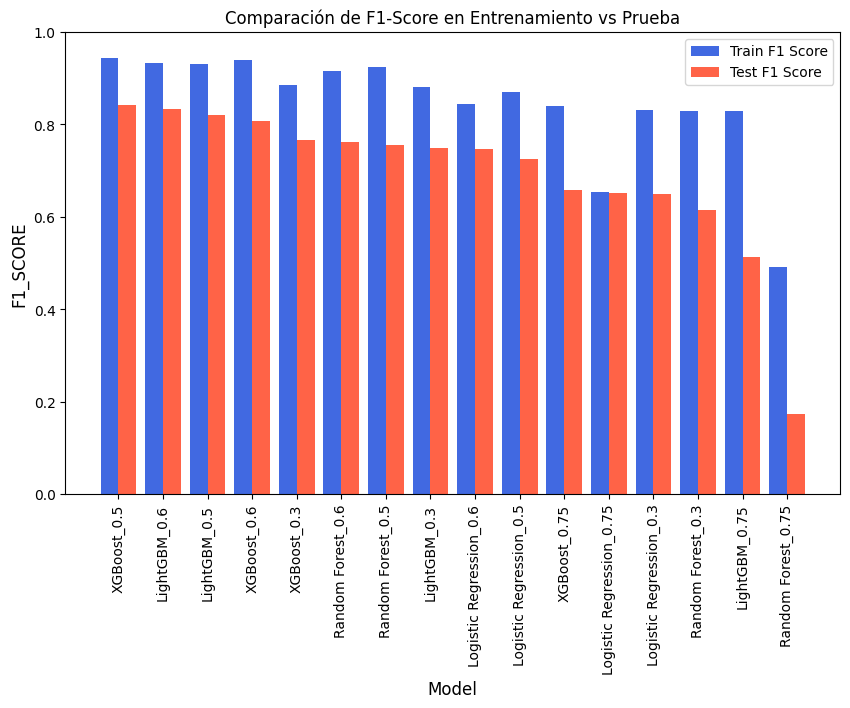

,Model,Threshold,Test_Accuracy,Test_Precision,Test_Recall,Test_F1_Score,Test_AUC,Train_Accuracy,Train_Precision,Train_Recall,Train_F1_Score,Train_AUC,F1_perc,Precision_perc,Recall_perc,AUC_perc,Confusion_Matrix
9,XGBoost,0.50,0.909548,0.786885,0.905660,0.842105,0.954381,0.942341,0.921311,0.967298,0.943745,0.986811,10.8,14.6,6.4,3.3,"[[133, 13], [5, 48]]"
14,LightGBM,0.60,0.909548,0.818182,0.849057,0.833333,0.945981,0.934596,0.961609,0.905336,0.932624,0.988147,10.6,14.9,6.2,4.3,"[[136, 10], [8, 45]]"
13,LightGBM,0.50,0.899497,0.779661,0.867925,0.821429,0.945981,0.931153,0.937173,0.924269,0.930676,0.988147,11.7,16.8,6.1,4.3,"[[133, 13], [7, 46]]"
10,XGBoost,0.60,0.894472,0.785714,0.830189,0.807339,0.954381,0.940620,0.955516,0.924269,0.939633,0.986811,14.1,17.8,10.2,3.3,"[[134, 12], [9, 44]]"
8,XGBoost,0.30,0.844221,0.637500,0.962264,0.766917,0.954381,0.870052,0.793716,1.000000,0.884996,0.986811,13.3,19.7,3.8,3.3,"[[117, 29], [2, 51]]"
6,Random Forest,0.60,0.884422,0.840909,0.698113,0.762887,0.944559,0.918244,0.946691,0.886403,0.915556,0.979352,16.7,11.2,21.2,3.6,"[[139, 7], [16, 37]]"
5,Random Forest,0.50,0.854271,0.681818,0.849057,0.756303,0.944559,0.922547,0.895330,0.956971,0.925125,0.979352,18.2,23.8,11.3,3.6,"[[125, 21], [8, 45]]"
12,LightGBM,0.30,0.829146,0.614458,0.962264,0.750000,0.945981,0.865749,0.789116,0.998279,0.881459,0.988147,14.9,22.1,3.6,4.3,"[[114, 32], [2, 51]]"
2,Logistic Regression,0.60,0.864322,0.740741,0.754717,0.747664,0.917162,0.851979,0.889524,0.803787,0.844485,0.927684,11.5,16.7,6.1,1.1,"[[132, 14], [13, 40]]"
1,Logistic Regression,0.50,0.829146,0.633803,0.849057,0.725806,0.917162,0.869191,0.858097,0.884682,0.871186,0.927684,16.7,26.1,4.0,1.1,"[[120, 26], [8, 45]]"


In [136]:
import joblib
# Identificar columnas numéricas y categóricas
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['category']).columns

# Definir transformaciones
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_features)
])



# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

preprocessor.fit(X_train)

# Apply preprocessing transformation BEFORE SMOTE
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

joblib.dump(preprocessor, 'preprocessor.pkl')

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier()
}

param_grid = {
    "Logistic Regression": {"C": [0.001, 0.01, 0.1]},
    "Random Forest": {"n_estimators": [3, 5, 10], "max_depth": [1,3,5]},
    "XGBoost": {"n_estimators": [3, 5, 10], "learning_rate": [0.001, 0.01, 0.1]},
    "LightGBM": {"n_estimators": [3, 5,10], "learning_rate": [0.001, 0.01, 0.1]}
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

results = []
all_predictions = {}
best_models = {}

def train_models():
    for name, model in models.items():
        grid = GridSearchCV(model, param_grid[name], scoring="f1", cv=cv, n_jobs=-1)
        grid.fit(X_train_resampled, y_train_resampled)
        best_models[name] = grid.best_estimator_
        print(f"Best model for {name}: {grid.best_params_}")



# Evaluación de modelos
thresholds = [0.3, 0.5, 0.6, 0.75]
df_predictions = pd.DataFrame(y_test).reset_index(drop=True)
metrics_summary = []

def evaluate_models():
    for name, model in best_models.items():
        y_train_prob = model.predict_proba(X_train_resampled)[:, 1]
        y_test_prob = model.predict_proba(X_test_transformed)[:, 1]
        df_predictions[f"{name}_prob"] = y_test_prob

        train_auc = roc_auc_score(y_train_resampled, y_train_prob)
        test_auc = roc_auc_score(y_test, y_test_prob)

        for threshold in thresholds:
            y_train_pred = (y_train_prob >= threshold).astype(int)
            y_test_pred = (y_test_prob >= threshold).astype(int)

            df_predictions[f"{name}_pred_{threshold}"] = y_test_pred

            train_f1 = f1_score(y_train_resampled, y_train_pred)
            test_f1 = f1_score(y_test, y_test_pred)

            test_accuracy = accuracy_score(y_test, y_test_pred)
            train_accuracy= accuracy_score(y_train_resampled, y_train_pred)

            test_precision = precision_score(y_test, y_test_pred)
            train_precision = precision_score(y_train_resampled, y_train_pred)

            test_recall = recall_score(y_test, y_test_pred)
            train_recall = recall_score(y_train_resampled, y_train_pred)

            conf_matrix = confusion_matrix(y_test, y_test_pred)

            f1_diff = round((train_f1 - test_f1)*100/train_f1,1)

            precision_diff =  round((train_precision - test_precision)*100/train_precision,1)
            recall_diff = round((train_recall - test_recall)*100/train_recall,1)
            auc_diff = round((train_auc - test_auc)*100/train_auc,1)

            metrics_summary.append({
                "Model": name,
                "Threshold": threshold,

                "Test_Accuracy": test_accuracy,
                "Test_Precision": test_precision,
                "Test_Recall": test_recall,
                "Test_F1_Score": test_f1,
                "Test_AUC": test_auc,




                "Train_Accuracy": train_accuracy,
                "Train_Precision": train_precision,
                "Train_Recall": train_recall,
                "Train_F1_Score": train_f1,
                "Train_AUC": train_auc,




                "F1_perc": f1_diff,
                "Precision_perc": precision_diff,
                "Recall_perc": recall_diff,
                "AUC_perc": auc_diff,

                "Confusion_Matrix": conf_matrix
            })

    return pd.DataFrame(metrics_summary)

# Ejecutar
train_models()
df_metrics = evaluate_models()
df_metrics =df_metrics.sort_values(by="Test_F1_Score", ascending=False)

# Configuración del gráfico de barras
plt.figure(figsize=(10, 6))
bar_width = 0.4
x = range(len(df_metrics))

plt.bar(x, df_metrics["Train_F1_Score"], width=bar_width, label="Train F1 Score", color="royalblue")

plt.bar([p + bar_width for p in x], df_metrics["Test_F1_Score"], width=bar_width, label="Test F1 Score", color="tomato")

# Crear etiquetas adecuadas
labels = [f"{model}_{threshold}" for model, threshold in zip(df_metrics["Model"], df_metrics["Threshold"])]

# Etiquetas y formato
plt.xlabel("Model", fontsize=12)
plt.ylabel("F1_SCORE", fontsize=12)
plt.xticks([p + bar_width / 2 for p in x], labels, rotation=90)
plt.title("Comparación de F1-Score en Entrenamiento vs Prueba")
plt.legend()
plt.ylim(0, 1)

# Mostrar gráfico
plt.show()

df_metrics.sort_values(by="Test_F1_Score", ascending=False)



In [137]:
best_models

{'Logistic Regression': LogisticRegression(C=0.1),
 'Random Forest': RandomForestClassifier(max_depth=5, n_estimators=10),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=10, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'LightGBM': LGBMClassifier(n_estimators=10)}

In [138]:
df_predictions

,Sales,Logistic Regression_prob,Logistic Regression_pred_0.3,Logistic Regression_pred_0.5,Logistic Regression_pred_0.6,Logistic Regression_pred_0.75,Random Forest_prob,Random Forest_pred_0.3,Random Forest_pred_0.5,Random Forest_pred_0.6,...,XGBoost_prob,XGBoost_pred_0.3,XGBoost_pred_0.5,XGBoost_pred_0.6,XGBoost_pred_0.75,LightGBM_prob,LightGBM_pred_0.3,LightGBM_pred_0.5,LightGBM_pred_0.6,LightGBM_pred_0.75
0,1,0.819126,1,1,1,1,0.660397,1,1,1,...,0.771913,1,1,1,1,0.822628,1,1,1,1
1,0,0.536415,1,1,0,0,0.516397,1,1,0,...,0.496307,1,0,0,0,0.271809,0,0,0,0
2,0,0.504939,1,1,0,0,0.402494,1,0,0,...,0.182015,0,0,0,0,0.179225,0,0,0,0
3,0,0.053908,0,0,0,0,0.045899,0,0,0,...,0.182015,0,0,0,0,0.179225,0,0,0,0
4,1,0.682129,1,1,1,0,0.551366,1,1,0,...,0.771913,1,1,1,1,0.669658,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,1,0.675376,1,1,1,0,0.619063,1,1,1,...,0.693858,1,1,1,0,0.669435,1,1,1,0
195,0,0.172971,0,0,0,0,0.140072,0,0,0,...,0.182015,0,0,0,0,0.179225,0,0,0,0
196,0,0.515243,1,1,0,0,0.423372,1,0,0,...,0.245298,0,0,0,0,0.362901,1,0,0,0
197,0,0.453469,1,0,0,0,0.360653,1,0,0,...,0.182015,0,0,0,0,0.179225,0,0,0,0


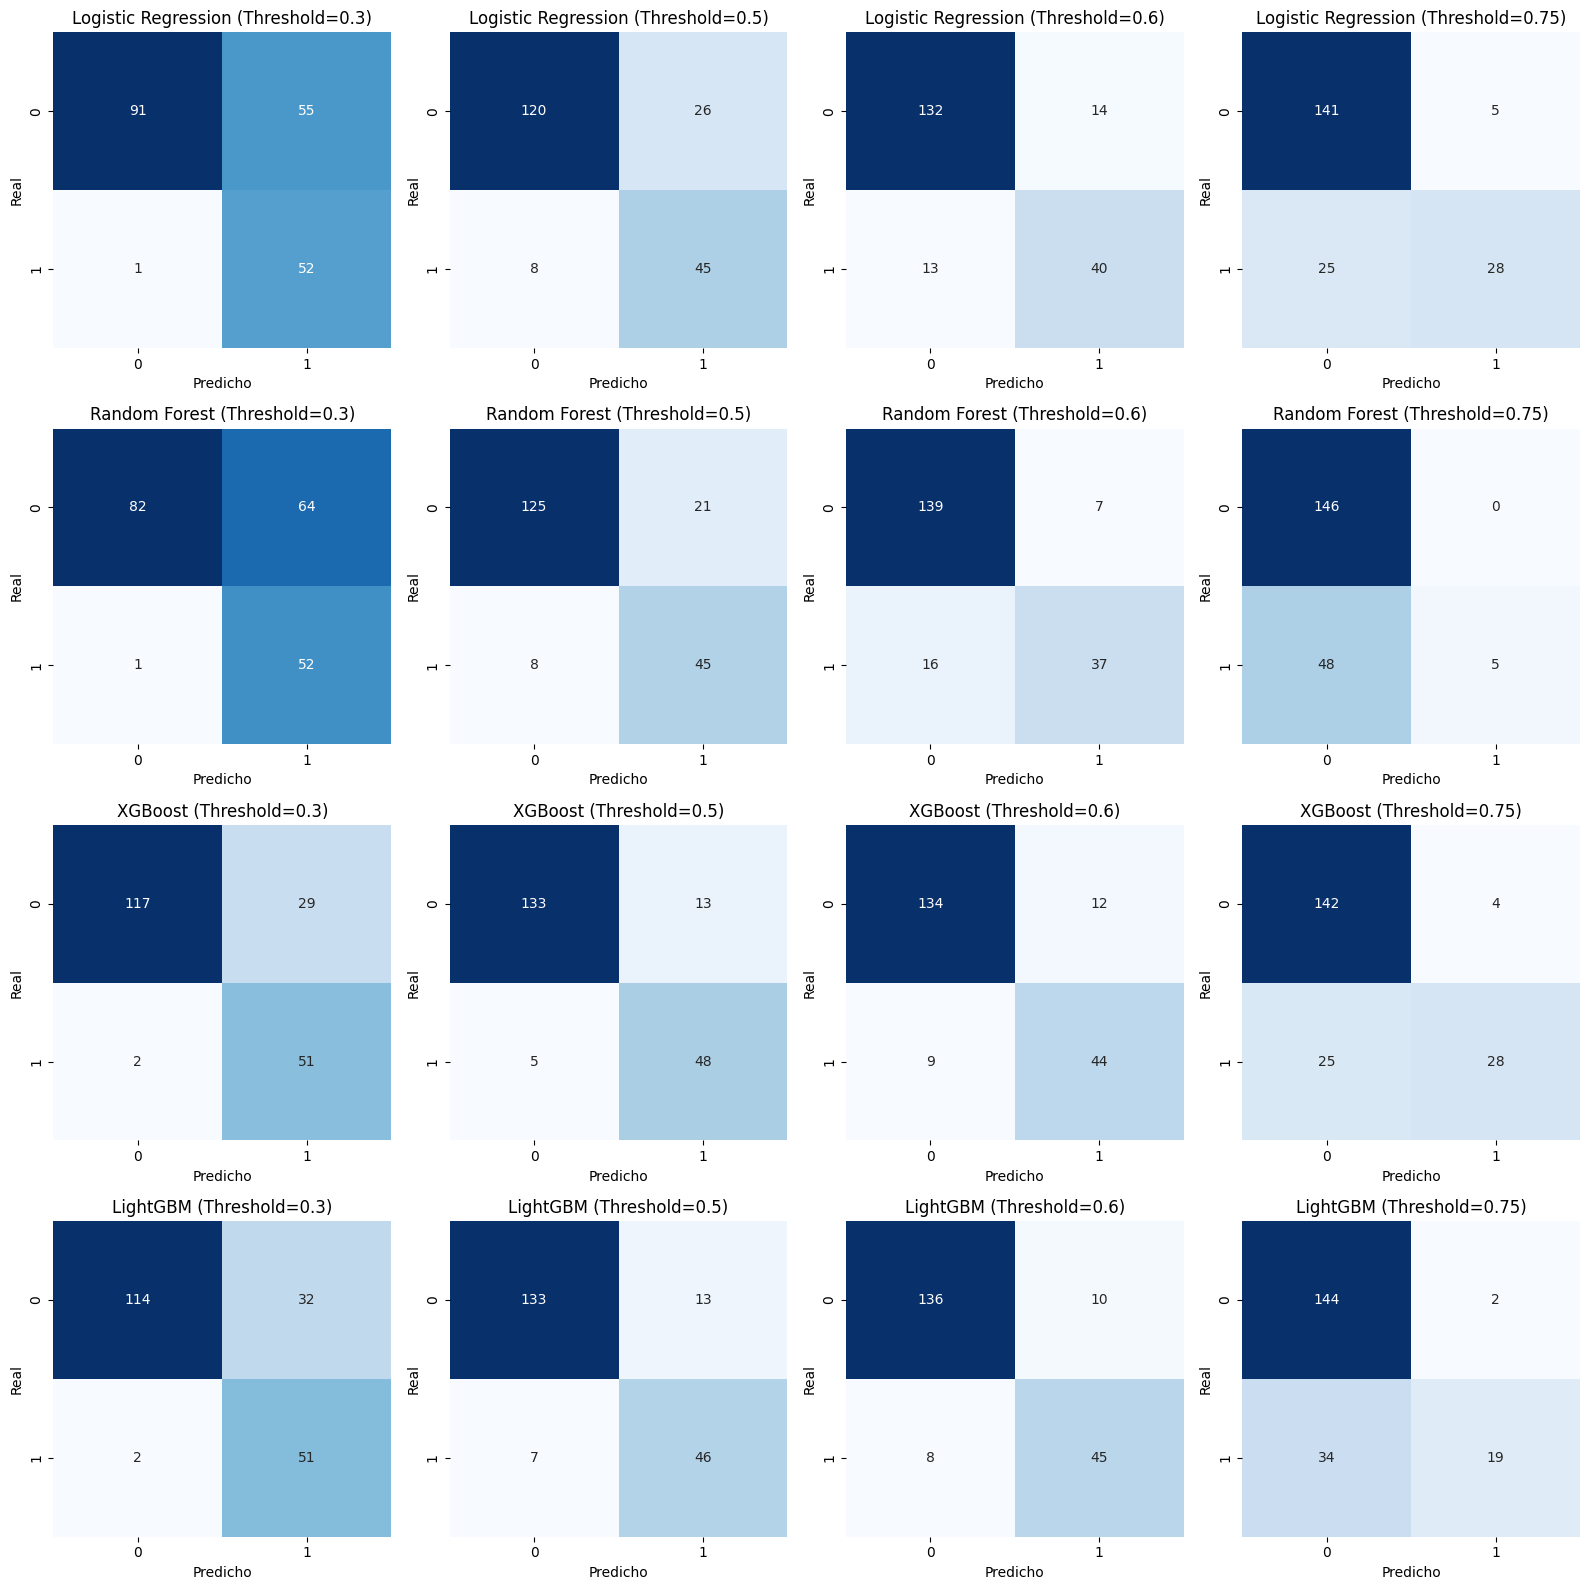

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 🔹 Función para graficar múltiples matrices de confusión en una cuadrícula
def plot_confusion_matrices_grid(models, df_predictions, y_test, thresholds):
    num_models = len(models)
    num_thresholds = len(thresholds)

    fig, axes = plt.subplots(num_models, num_thresholds, figsize=(num_thresholds * 4, num_models * 4))

    for i, (name, model) in enumerate(models.items()):
        for j, threshold in enumerate(thresholds):
            y_test_pred = (df_predictions[f"{name}_prob"] >= threshold).astype(int)
            cm = confusion_matrix(y_test, y_test_pred)

            # Seleccionar el eje correcto en la cuadrícula
            ax = axes[i, j] if num_models > 1 and num_thresholds > 1 else axes[max(i, j)]

            # Graficar la matriz de confusión
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
            ax.set_xlabel("Predicho")
            ax.set_ylabel("Real")
            ax.set_title(f'{name} (Threshold={threshold})')

    plt.tight_layout()
    plt.show()

# 🔹 Llamada a la función
plot_confusion_matrices_grid(models, df_predictions, y_test, thresholds)


In [140]:
import pickle
import os

# 🔹 Crear carpeta para guardar modelos si no existe
save_path = "mejores_modelos"
os.makedirs(save_path, exist_ok=True)

# 🔹 Guardar cada modelo en un archivo .pkl
for model_name, model in best_models.items():
    filename = os.path.join(save_path, f"{model_name}.pkl")
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Modelo guardado: {filename}")


Modelo guardado: mejores_modelos/Logistic Regression.pkl
Modelo guardado: mejores_modelos/Random Forest.pkl
Modelo guardado: mejores_modelos/XGBoost.pkl
Modelo guardado: mejores_modelos/LightGBM.pkl


In [141]:
url='https://github.com/gbuvoli/Prueba_tecnica_TP/raw/refs/heads/main/Sales_outbound_New.xlsx'

df=pd.read_excel(url)
df.columns

Index(['Client_ID', 'Name', 'Age', 'Location', 'Income', 'TAX',
       'previous sales_# ', 'Type_of_Products', 'Contact_Channel',
       'Contact_hour', 'Num_Contacts', 'Satisfaction_Score'],
      dtype='object')

In [142]:
df

,Client_ID,Name,Age,Location,Income,TAX,previous sales_#,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score
0,1,NaN,51,FL,80000,12000.00,1,B,Email,05:30:00,1,4
1,2,NaN,40,CA,82579,12386.85,5,A,Phone,16:45:00,2,4
2,3,NaN,25,NY,58380,8757.00,3,C,Online Chat,06:30:00,4,5
3,4,NaN,57,IL,75000,11250.00,0,A,Email,05:30:00,3,2
4,5,NaN,61,CA,50049,7507.35,0,B,Email,09:00:00,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
94,95,NaN,48,IL,71235,10685.25,4,C,Phone,16:30:00,7,3
95,96,NaN,22,IL,65057,9758.55,2,A,Phone,05:30:00,1,3
96,97,NaN,40,FL,31239,4685.85,0,A,Email,05:30:00,2,1
97,98,NaN,31,NY,95661,14349.15,1,B,Email,05:30:00,2,5


In [145]:
import pandas as pd
import pickle
import requests
from io import BytesIO
import lightgbm as lgb
import joblib

ddf= df.drop(['Client_ID','Name','TAX'], axis=1)

ddf[['Location', 'Type_of_Products', 'Contact_Channel', 'Contact_hour', 'Satisfaction_Score']] = ddf[['Location', 'Type_of_Products', 'Contact_Channel', 'Contact_hour', 'Satisfaction_Score']].astype('category')

ddf.rename(columns={'previous sales_# ': 'Previous_Sales_Amnt'}, inplace=True)

print(ddf.columns)
# URL del archivo de modelo en GitHub (asegúrate de usar la URL RAW)
url_modelo = 'https://github.com/gbuvoli/Prueba_tecnica_TP/raw/refs/heads/main/Models/LightGBM.pkl'

url_preprocessor = 'https://github.com/gbuvoli/Prueba_tecnica_TP/raw/refs/heads/main/Models/preprocessor.pkl'

# Descargar el archivo del modelo desde GitHub
response = requests.get(url_preprocessor)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Cargar el modelo usando pickle
    preprocessor_load = joblib.load(BytesIO(response.content))
    print(type(preprocessor_load))

    ddf_trans = preprocessor_load.transform(ddf)

else:
    result = f"Error: No se pudo descargar el archivo del preprocesador. Código de error: {response.status_code}"



#-------------------------------------------------------------#

# Descargar el archivo del modelo desde GitHub
response = requests.get(url_modelo)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Cargar el modelo usando pickle
    model = pickle.load(BytesIO(response.content))

    # Suponiendo que ya tienes los datos cargados en el DataFrame 'df'
    # Aplicar el modelo a los datos para hacer las predicciones
    #predicciones = model.predict(ddf_trans)
    probabilities = model.predict_proba(ddf_trans)[:,1]
    predicciones = (probabilities >= 0.6).astype(int)

    # Agregar las predicciones como una nueva columna al DataFrame
    ddf['Sales_Probab'] = probabilities
    ddf['Sales_Predicted'] = predicciones

    # Devolver el DataFrame con las predicciones a Power BI
    result = ddf
else:
    result = f"Error: No se pudo descargar el archivo del modelo. Código de error: {response.status_code}"

# Devolver el resultado
result


Index(['Age', 'Location', 'Income', 'Previous_Sales_Amnt', 'Type_of_Products',
       'Contact_Channel', 'Contact_hour', 'Num_Contacts',
       'Satisfaction_Score'],
      dtype='object')
<class 'sklearn.compose._column_transformer.ColumnTransformer'>


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Age,Location,Income,Previous_Sales_Amnt,Type_of_Products,Contact_Channel,Contact_hour,Num_Contacts,Satisfaction_Score,Sales_Probab,Sales_Predicted
0,51,FL,80000,1,B,Email,05:30:00,1,4,0.275854,0
1,40,CA,82579,5,A,Phone,16:45:00,2,4,0.822628,1
2,25,NY,58380,3,C,Online Chat,06:30:00,4,5,0.817107,1
3,57,IL,75000,0,A,Email,05:30:00,3,2,0.179225,0
4,61,CA,50049,0,B,Email,09:00:00,1,4,0.186337,0
...,...,...,...,...,...,...,...,...,...,...,...
94,48,IL,71235,4,C,Phone,16:30:00,7,3,0.178197,0
95,22,IL,65057,2,A,Phone,05:30:00,1,3,0.313500,0
96,40,FL,31239,0,A,Email,05:30:00,2,1,0.179225,0
97,31,NY,95661,1,B,Email,05:30:00,2,5,0.238166,0
